## Intro

This notebook is a miniproject investigates on [world happiness report released in 2021](https://www.kaggle.com/ajaypalsinghlo/world-happiness-report-2021) usinng visualizations to gain experience in using Seaborn visualization tools to solve real-world problems. The goal of these visualizations is to investigate the differences in happiness dimensions between 2019 and 2020 (before and during COVID19 panadamy).

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [88]:
#loading files into a DataFrame
my_filepath = '../input/world-happiness-report-2021/world-happiness-report.csv'
happiness_data = pd.read_csv(my_filepath)
my_filepath_2021 = '../input/world-happiness-report-2021/world-happiness-report-2021.csv'
happiness_data_2021 = pd.read_csv(my_filepath_2021)

# appending 2021 dataset to previous years
selected_2021_cols=['Country name','Ladder score',
        'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
        'Freedom to make life choices', 'Generosity',
        'Perceptions of corruption']
happiness_data_2021 = happiness_data_2021[selected_2021_cols]
happiness_data_2021["year"]=2021
happiness_data_2021.rename(columns={'Ladder score':"Life Ladder", "Logged GDP per capita":"Log GDP per capita", "Healthy life expectancy" : "Healthy life expectancy at birth"}, inplace = True)
happiness_data = happiness_data.append(happiness_data_2021)
happiness_data

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.800,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.200,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.600,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.920,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.240,0.531,0.236,0.776,0.710,0.268
...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,2021,3.512,7.926,0.787,48.700,0.715,-0.131,0.915,NaN,NaN
145,Botswana,2021,3.467,9.782,0.784,59.269,0.824,-0.246,0.801,NaN,NaN
146,Rwanda,2021,3.415,7.676,0.552,61.400,0.897,0.061,0.167,NaN,NaN
147,Zimbabwe,2021,3.145,7.943,0.750,56.201,0.677,-0.047,0.821,NaN,NaN


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


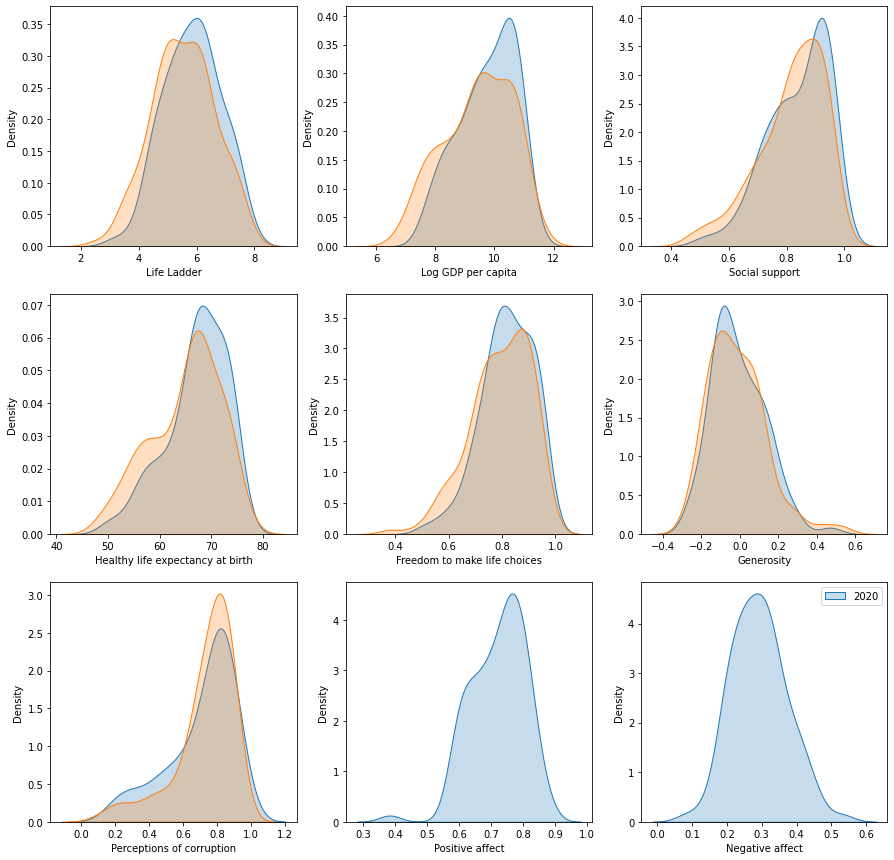

In [89]:
#comparing happiness variables in 2019 and 2020
fig, axes = plt.subplots(3,3,figsize=(15,15))
for col_num,col in enumerate(happiness_data.columns[2:]): # the first column is the year
    sns.kdeplot(data=happiness_data[happiness_data["year"]==2020][col], label="2020", shade=True, ax=axes[col_num//3,col_num%3])
    sns.kdeplot(data=happiness_data[happiness_data["year"]==2021][col], label="2021", shade=True, ax=axes[col_num//3,col_num%3])
    plt.legend()
plt.show()


The swarm plots compare different happiness metrics in 2019 and 2020. We can see there were less data collected in 2020. However, the happiness metrics had higher mean in 2020 than 2019. However, this viuslaizations of these metrics include all contries. Since different countries had worse or better situation in managing COVID19, we will have a deeper look at how these happiness metrics changed from 2019 to 2020 in different countries.

In [94]:
#selecting data from 2020 and 2019 
cols = ['Life Ladder', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption']
happiness_data_20 = happiness_data[happiness_data["year"]==2020].set_index("Country name")[cols]
happiness_data_21 = happiness_data[happiness_data["year"]==2021].set_index("Country name")[cols]


difference = happiness_data_21 - happiness_data_20
difference.dropna(inplace=True)
difference.head()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
Country name,,,,,,,
Albania,-0.248,0.023,-0.013,-0.301,0.031,-0.037,0.010
Argentina,0.028,0.112,0.001,-0.200,0.005,-0.060,0.018
Australia,0.046,0.036,0.003,-0.300,0.009,-0.051,-0.049
Austria,0.055,0.055,0.009,-0.300,-0.004,0.031,0.017
Bangladesh,-0.255,-0.018,-0.046,-0.500,0.100,-0.032,-0.060


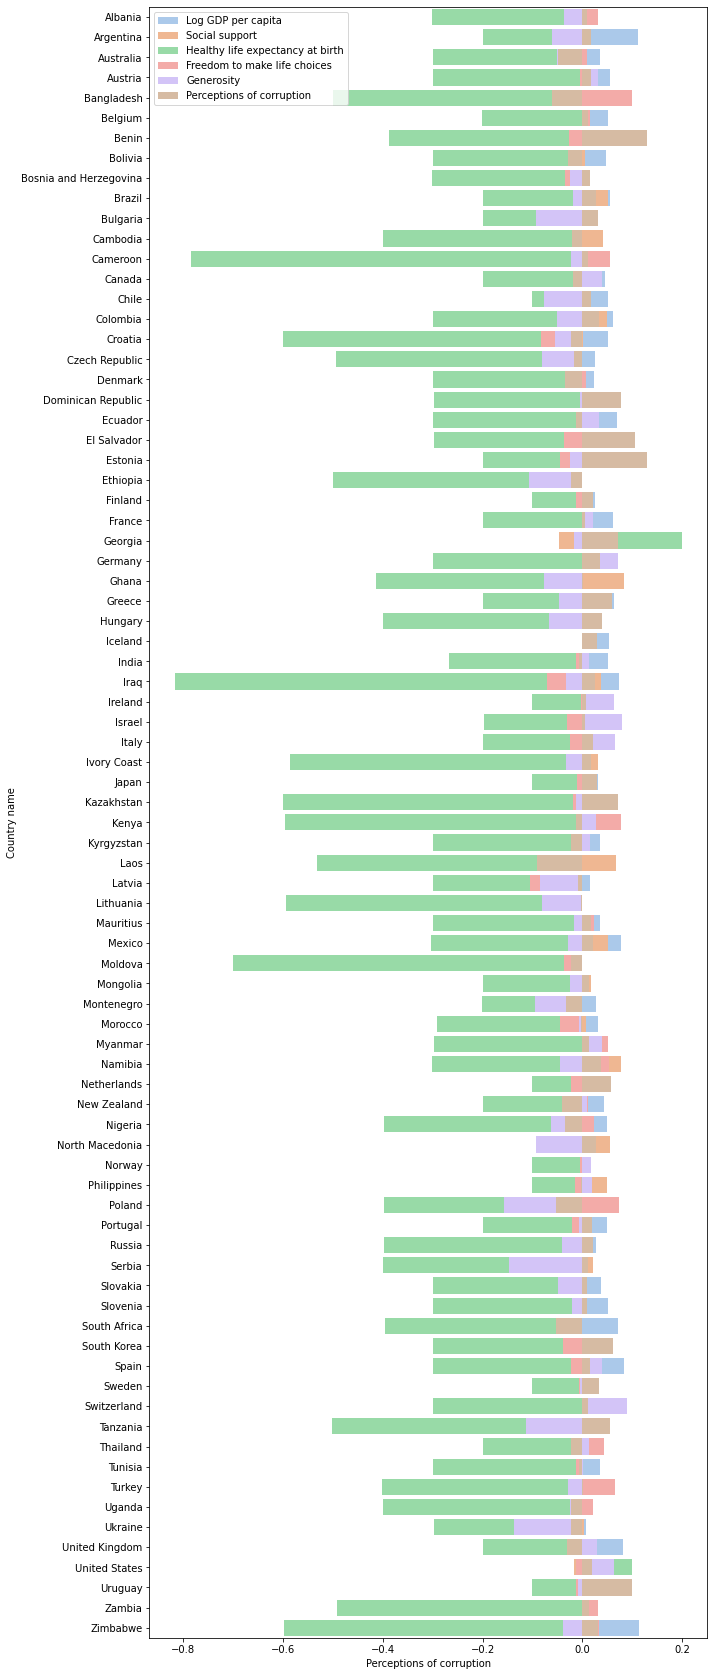

In [95]:


plt.figure(figsize=(10,30))
colors = sns.color_palette("pastel")
col_no = 0
for col in difference.columns[1:]:
    sns.barplot(y=difference.index, x=difference[col], color=colors[col_no], label = col) # Your code here
    col_no+=1
plt.legend()
plt.show()